<a class="anchor" id="0.1"></a>
## Visualizing Time Series Data with Python

Data represented in a single point in time is known as cross-sectional data. As a Data Scientist or Analyst, sometimes you might encounter data that is collected over periods of time, known as time series data.

Time series data shows up in the real world quite often. For example, weather readings, company stock prices, and sales data are all examples of data that can be tracked over time. Therefore, it’s important that you are able to explore and visualize data with a time component.

- [Line Plots](#1)
- [Box Plots](#2)
- [Heatmaps](#3)
- [Lag Scatter Plots](#4)
- [Autocorrelation Plots](#5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("sales_data")
df["Date"] = pd.to_datetime(df["Date"])
df.head(2)

,Date,Sales
0,2012-07-01,76819
1,2012-07-02,78963


### Line Plots <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

A line plot is commonly used for visualizing time series data. In a line plot, time is usually on the x-axis and the observation values are on the y-axis.

#### Exercise
Let’s create a line plot of the data, with date on the x-axis and sales on the y-axis.

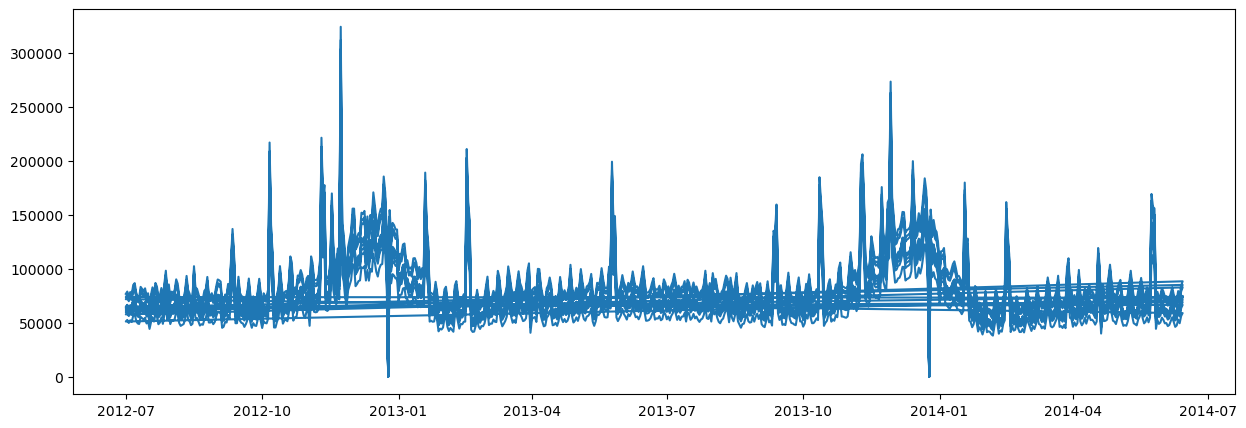

In [64]:
plt.figure(figsize=(15,5))
plt.plot(df["Date"], df["Sales"])

**Notice how we can see the trend of the data over time. Looking at the chart, it seems that:**
   - Sales are seasonal, peaking at the beginning of each year, and slowing down in the other months of each year.
   - Sales don’t seem to show signs of growth over time. This appears to be a stagnant business.

### Box Plots <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

When working with time series data, box plots can be useful to see the distribution of values grouped by time interval.

#### Exercise
For example, let’s create a box plot for each year of sales and put them side-to-side for comparison.

In [68]:
df["Year"] = df["Date"].dt.year

<AxesSubplot:xlabel='Year', ylabel='Sales'>

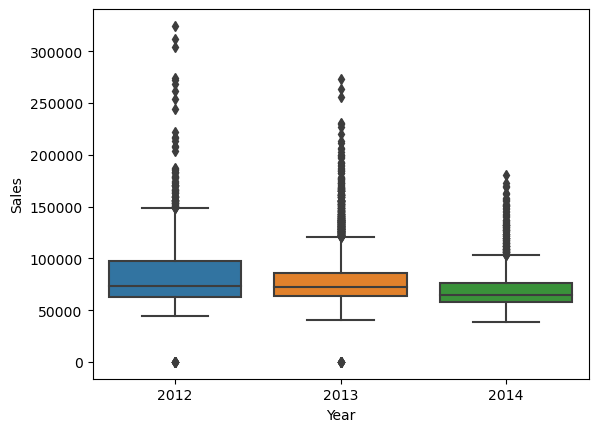

In [69]:
sns.boxplot(data = df, x = "Year", y = "Sales")

**For each year of the sales data, we can easily see useful information such as median sales, the highest and lowest sales, the interquartile range of our data, and any outliers.**

**Median sales for each year (represented by the horizontal line in each box) are not totally stable, suggesting that sales are slightly falling over time.**

### Heatmaps <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

We can also use a heatmap to compare observations between time intervals in time series data.

#### Exercise
For example, let’s create a density heatmap with year on the y-axis and month on the x-axis. This can be done by invoking the `heatmap()` function of the sns Seaborn object.

In [73]:
df["Month"] = df["Date"].dt.month

In [78]:
sales = df.groupby(["Year", "Month"]).sum()

In [84]:
sales_month_year = sales.reset_index().pivot(index = "Year", columns = "Month", values = "Sales")

In [87]:
sales_month_year

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,20705060.0,20662305.0,20823692.0,23821791.0,31301814.0,37131593.0
2013,26177117.0,19532320.0,21599368.0,20572194.0,24261468.0,21579275.0,21793519.0,21379376.0,21458821.0,23479475.0,33028202.0,37134502.0
2014,24571791.0,17538928.0,19923738.0,20478793.0,22735867.0,9040226.0,NaN,NaN,NaN,NaN,NaN,NaN


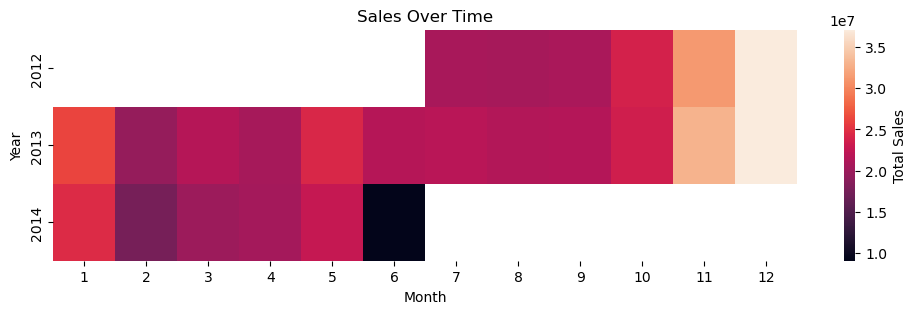

In [102]:
plt.figure(figsize=(12, 3))
sns.heatmap(sales_month_year, cbar_kws = {"label" : "Total Sales"})
plt.title("Sales Over Time");

**Recall that in a heatmap, as the color gets brighter and moves from dark purple to yellow, the total sales in the corresponding cell is higher.**

### Lag Scatter Plots <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

We can use a lag scatter plot to explore the relationship between an observation and a lag of that observation.

In a time series, a lag is a previous observation:

- The observation at a previous time step (the smallest time interval for which we have distinct measurements) is called lag 1.
- The observation at two times ago is called lag 2, etc.

In the `sales_data` dataset, we have a different sales value for each day. Therefore, the lag 1 value for any particular day is equal to the sales on the previous day. The lag 2 value is the sales two days ago, etc.

#### Exercise
The plotting module of the pandas library has a built-in `lag_plot` function that plots the observation at time t on the x-axis and the lag 1 observation (t+1) on the y-axis. Lets try.

In [104]:
from pandas.plotting import lag_plot

In [118]:
df

,Date,Sales,Year,Month
0,2012-07-01,76819,2012,7
1,2012-07-02,78963,2012,7
2,2012-07-03,74824,2012,7
3,2012-07-04,78523,2012,7
4,2012-07-05,76445,2012,7
...,...,...,...,...
7135,2014-06-10,60188,2014,6
7136,2014-06-11,67108,2014,6
7137,2014-06-12,62812,2014,6
7138,2014-06-13,71342,2014,6


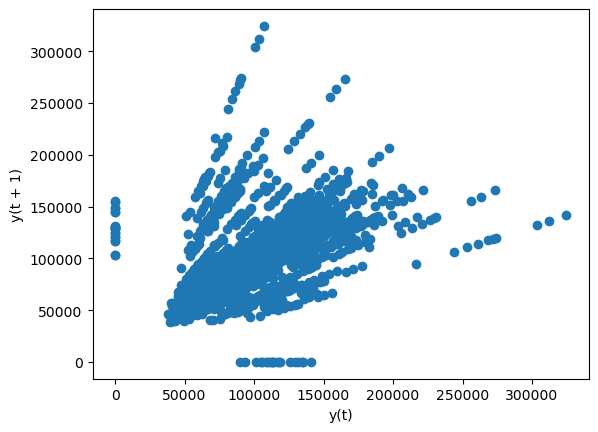

In [122]:
lag_plot(df["Sales"]);

**How can we interpret a lag scatter plot?**

- If the points move from the bottom left to the top right, this indicates a positive correlation between observations and their lag 1 values. For example, high sales on one day are associated with high sales on the previous day.


- If the points move from the top left to the bottom right, this indicates a negative correlation between observations and their lag 1 values. For example, high sales on one day are associated with low sales on the previous day and vice versa.


- If there is no identifiable structure in the lag plot, this indicates the data is random, and there is no association between values at consecutive time points. For example, sales on one day tell you no information about expected sales on the following day.

Exploring the relationship between an observation and a lag of that observation is useful for helping us determine whether a dataset is random.

### Autocorrelation Plots <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

An autocorrelation plot is used to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.

#### Exercise
This can be plotted with the ``autocorrelation_plot()`` function of the ``pandas.plotting`` module:

In [123]:
from pandas.plotting import autocorrelation_plot

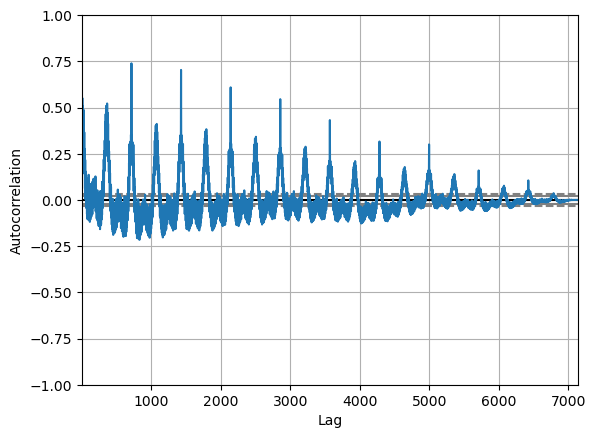

In [126]:
autocorrelation_plot(df["Sales"])
plt.show()

**In the autocorrelation plot above, lag is on the x-axis and the value of the autocorrelation, which ranges from -1 to 1, is on the y-axis. A value near 0 indicates a weak correlation while values closer to -1 and 1 indicate a strong correlation.**

**Notice how the autocorrelation plot for the sales data forms waves, oscillating between strong negative and positive correlation. These waves suggest that our dataset exhibits seasonality.**

---